# Case
Verificar se as amostras estão dentro dos limites definidos como padrão de qualidade, foi feito uma coleta de 1000 amostras, sendo 200 delas do produto B.

**Pergunta 1** - Como estão dispostas as medidas de comprimento e altura da amostra B?

**Pergunta 2** - Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está acima ou abaixo do valor 5.1 e 4.9, quais seriam rejeitados?

## Variáveis de interesse
Os dados necessários para a análisar a dispersão dos produtos dentro do padrão de qualidade estabelecido são comprimento e largura.

### Variável - Comprimento
É obtido fazendo a medida manual de cada caixa de sabão.

### Variável - Ano
É obtido fazendo a medida manual de cada caixa de sabão.

### Gráfico
O objetivo é analisar duas variáveis númericas e como elas se relacionam, para este caso um gráfico de dispersão atende.

# Resultado - 1 a cada 20 está fora do padrão de qualidade
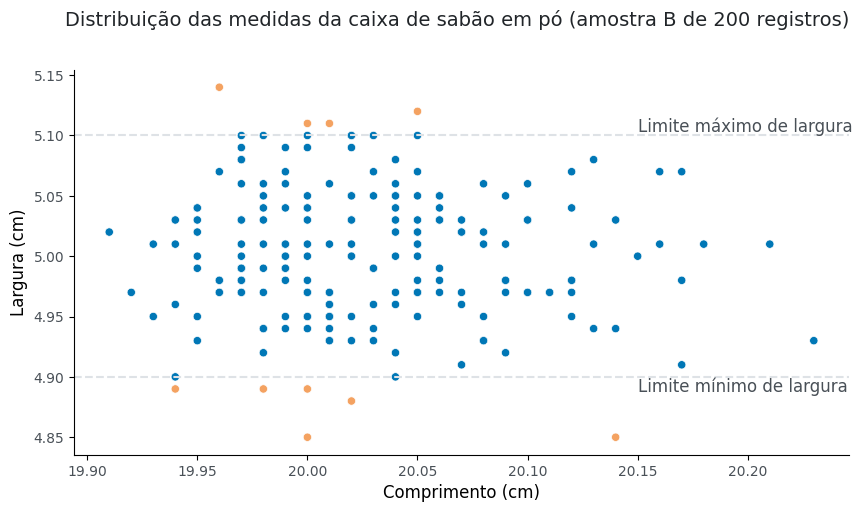

In [ ]:
# Paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_b = df_medidas.query('amostra == "B"')[["comprimento", "largura"]]

df_b.head()

(200, 2)

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Definindo as cores do gráfico e a porcentagem de rejeição
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

# Mapeando as cores para a faixa requisitada (2%)
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_b["comprimento"]]
rejeita_larg = [True if (a > 5*(1+pct) or a < 5*(1-pct)) else False for a in df_b["largura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# Gerando o gráfico de dispersão
ax = sns.scatterplot(data = df_b, x="comprimento", y = "largura", color = map_cores)

# Personalizando o gráfico
plt.suptitle('Distribuição das medidas da caixa de sabão em pó (amostra B de 200 registros)', size=14, color=CINZA1, ha = 'right', x = 0.9, y = 1)
ax.set_xlabel('Comprimento (cm)', fontsize = 12)
ax.set_ylabel('Largura (cm)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine()

### Desenhando as linhas verticais com os limites mínimos e máximo de altura desejada
ax.text(20.15, 5.1, 'Limite máximo de largura', fontsize=12, color = CINZA2, ha="left", va = "bottom")
plt.axhline(y = 5 * (1 + pct), color = CINZA4, linestyle='--')
ax.text(20.15, 4.9, 'Limite mínimo de largura', fontsize=12, color = CINZA2, ha="left", va = "top")
plt.axhline(y = 5 * (1 - pct), color = CINZA4, linestyle='--')

plt.show()